<a href="https://colab.research.google.com/github/HinePo/diabetes-ML-and-DL-study/blob/master/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description

In this kernel we will try to predict if a person has diabetes or not. We will do some preliminary modeling analysis and compare the results. It is contained: 

1. Applications for some models
2. Plot accuracy from models
3. Training the best model
4. Predictions

Best model: 

Dataset can be found in
https://www.kaggle.com/uciml/pima-indians-diabetes-database

#### Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

#### Loading dataset

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

### Defining features and target

In [5]:
all_vars = np.array(df.columns)
all_vars

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

We will use the following eight variables to predict diabetes:

- Number of times pregnant
- Glucose
- Blood pressure
- Skin thickness
- Insulin
- Body mass index
- Diabetes pedigree function
- Age

In [6]:
# features: columns the classifier will use to predict

features = np.array(all_vars[0:8])
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

Outcome column will be the target/predicted variable.

Outcome = 0 : healthy

Outcome = 1 : diabetes predicted

In [7]:
# target: column we want to predict

target = np.array(all_vars[8])
target

array('Outcome', dtype='<U7')

### Splitting the dataset

In [8]:
# split dataset using arrays as filters
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2,
                                                      stratify = df[target], random_state = 0)

In [9]:
# Creating variables to store the results
all_models = np.array([])
all_scores = np.array([])

In [10]:
all_models

array([], dtype=float64)

### Evaluation functions

### 1.Support Vector Machine (SVM)

Link for documentation:
https://scikit-learn.org/stable/modules/svm.html

In [11]:
from sklearn.svm import LinearSVC

In [12]:
def svm_test(X_train, y_train, cv = 10):
  np.random.seed(0)
  svc = LinearSVC()
  cv_scores = cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [13]:
res = svm_test(X_train, y_train)

Average of  10 tests:  0.5700158646218931


In [14]:
# updating results
all_models = np.append(all_models, "SVM")
all_scores = np.append(all_scores, res)

In [15]:
all_models, all_scores

(array(['SVM'], dtype='<U32'), array([0.57001586]))

### 2.Extra Trees Classifier

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
def ext_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  ext = ExtraTreesClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(ext, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [18]:
res = ext_test(X_train, y_train)

Average of  10 tests:  0.7296404019037546


In [19]:
# updating results
all_models = np.append(all_models, "ETC")
all_scores = np.append(all_scores, res)

### 3.Random Forest Classifier

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
def rfc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [22]:
res = rfc_test(X_train, y_train)

Average of  10 tests:  0.7460074034902169


In [23]:
# updating results
all_models = np.append(all_models, "RFC")
all_scores = np.append(all_scores, res)

### 4.XGBClassifier

Link for documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [24]:
from xgboost import XGBClassifier

In [25]:
def xgbc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  xgb = XGBClassifier()
  cv_scores = cross_val_score(xgb, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [26]:
res = xgbc_test(X_train, y_train)

Average of  10 tests:  0.7492596509783183


In [27]:
# updating results
all_models = np.append(all_models, "XGB")
all_scores = np.append(all_scores, res)

### 5.Multi-Layer Perceptron (MLP)

Link for documentation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
def mlp_test(X_train, y_train, cv = 10):
  np.random.seed(0)

  mlp = MLPClassifier()
  scaler = StandardScaler()

  pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

  cv_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv,  'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [30]:
res = mlp_test(X_train, y_train)

Average of  10 tests:  0.7508989952406134


In [31]:
# updating results
all_models = np.append(all_models, "MLP")
all_scores = np.append(all_scores, res)

### 6.Keras Sequential Model

Link for documentation: https://keras.io/guides/sequential_model/

In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [33]:
# define the keras model
model = Sequential()

# 8 input features (input_dim)
model.add(Dense(12, input_dim=8, activation='relu'))

model.add(Dense(8, activation='relu'))

# last layer must be activated with sigmoid or softmax since we want results in (0, 1) range (probabilities)
model.add(Dense(1, activation='sigmoid'))

# compile the keras model, choose metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose = 0)

In [35]:
# evaluate model
test_loss, res = model.evaluate(X_test, y_test)
round(test_loss, 4), round(res, 4)

154/154 [==============================] - 0s 116us/step


(0.4445, 0.7857)

In [36]:
# updating results
all_models = np.append(all_models, "Keras trained")
all_scores = np.append(all_scores, res)

In [37]:
# predict classes with the model
# class 0 : no diabetes 
# class 1 : diabetes predicted :(
predict_class = model.predict_classes(X_test)
predict_class[10:15]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [38]:
# predict probabilities on test data
y_pred = model.predict(X_test)
y_pred[0:5]

array([[0.07095709],
       [0.06524929],
       [0.05499297],
       [0.3260594 ],
       [0.5726539 ]], dtype=float32)

In [39]:
# we will need this to calculate confusion matrix
rounded = [round(x[0]) for x in y_pred]
rounded[0:20]

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [40]:
# summarize the first n cases
n = 5
for i in range(n):
	print('%s => \n %d (expected %d)\n\n' % (X_test.iloc[i, ].tolist(), rounded[i], y_test.iloc[i]))

[2.0, 56.0, 56.0, 28.0, 45.0, 24.2, 0.332, 22.0] => 
 0 (expected 0)


[1.0, 92.0, 62.0, 25.0, 41.0, 19.5, 0.48200000000000004, 25.0] => 
 0 (expected 0)


[1.0, 100.0, 74.0, 12.0, 46.0, 19.5, 0.149, 28.0] => 
 0 (expected 0)


[7.0, 97.0, 76.0, 32.0, 91.0, 40.9, 0.871, 32.0] => 
 0 (expected 1)


[6.0, 151.0, 62.0, 31.0, 120.0, 35.5, 0.6920000000000001, 28.0] => 
 1 (expected 0)




In [41]:
# input to confusion_matrix must be an array of int (rounded)
# obviously, we can only call confusion_matrix once we already called the fit method on the model
matrix = confusion_matrix(y_test, rounded)

In [42]:
matrix

array([[94,  6],
       [27, 27]])

### Comparing Models

In [43]:
# check models and scores arrays
all_models, all_scores

(array(['SVM', 'ETC', 'RFC', 'XGB', 'MLP', 'Keras trained'], dtype='<U32'),
 array([0.57001586, 0.7296404 , 0.7460074 , 0.74925965, 0.750899  ,
        0.78571427]))

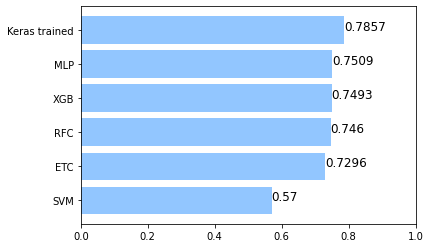

In [44]:
# plot model results

fig, ax = plt.subplots()
ax.barh(all_models, all_scores)
plt.xlim(0, 1)
for index, value in enumerate(all_scores):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

In [45]:
best_model = all_models[all_scores.argmax()]

In [46]:
# this is just a string, it doesn't contain the model parameters
best_model

'Keras trained'

### Training best model

In [47]:
# Defining model
mlp = MLPClassifier()

# using a scaler, since it is a neural network
scaler = StandardScaler()

# creating the pipeline with scaler and then MLP
pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

In [48]:
# fit/train the algorithm on the train data
pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

# Making predictions

In [49]:
# predict classes with the model
# class 0 : no diabetes 
# class 1 : diabetes predicted :(
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [50]:
pipe.predict_proba(X_train)

array([[0.07535198, 0.92464802],
       [0.95430769, 0.04569231],
       [0.74066042, 0.25933958],
       ...,
       [0.97866247, 0.02133753],
       [0.55819185, 0.44180815],
       [0.60431826, 0.39568174]])

In [51]:
res = pipe.score(X_test, y_test)
res

0.8376623376623377

In [52]:
# now that we trained (fit) the model, we can calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[90, 15],
       [10, 39]])

# Last results

In [53]:
# updating results (appending trained model)
all_models = np.append(all_models, "MLP trained")
all_scores = np.append(all_scores, res)

In [54]:
all_models, all_scores

(array(['SVM', 'ETC', 'RFC', 'XGB', 'MLP', 'Keras trained', 'MLP trained'],
       dtype='<U32'),
 array([0.57001586, 0.7296404 , 0.7460074 , 0.74925965, 0.750899  ,
        0.78571427, 0.83766234]))

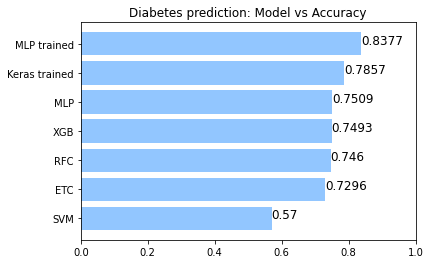

In [55]:
# plot model results with trained model

fig, ax = plt.subplots()
ax.barh(all_models, all_scores)
plt.xlim(0, 1)
plt.title("Diabetes prediction: Model vs Accuracy")
for index, value in enumerate(all_scores):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

# Conclusions

MLP Classifier is probably a good option here. It has 83.77 % validation accuracy.